<a href="https://colab.research.google.com/github/Piyaphum/OpenCV/blob/main/Image_Processing_Basic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Upload image

### Subtask:
Provide a way for the user to upload an image file to the Colab environment.


**Reasoning**:
The subtask is to provide a way for the user to upload an image file. The `google.colab.files.upload()` function is the appropriate tool for this in a Colab environment.



In [14]:
# นำเข้าโมดูล files จาก google.colab เพื่อใช้ฟังก์ชันเกี่ยวกับการจัดการไฟล์ใน Colab
from google.colab import files

# เรียกใช้ฟังก์ชัน upload() เพื่อเปิดหน้าต่างให้อัปโหลดไฟล์
# ไฟล์ที่อัปโหลดจะถูกเก็บไว้ในตัวแปร uploaded เป็น dictionary
# โดย key คือชื่อไฟล์ และ value คือข้อมูลไฟล์ในรูปแบบ bytes
uploaded = files.upload()

# วนลูปเพื่อแสดงข้อมูลของไฟล์ที่อัปโหลดแต่ละไฟล์
# fn คือชื่อไฟล์ที่อัปโหลด
for fn in uploaded.keys():
  # พิมพ์ชื่อไฟล์และความยาว (ขนาด) ของไฟล์ในหน่วย bytes
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Jessica.jpg to Jessica (1).jpg
User uploaded file "Jessica (1).jpg" with length 23166 bytes


In [15]:
# นำเข้าไลบรารี numpy สำหรับการจัดการข้อมูลตัวเลข (เช่น อาร์เรย์ของพิกเซล)
import numpy as np
# นำเข้าไลบรารี cv2 (OpenCV) สำหรับงานประมวลผลภาพ
import cv2

# เข้าถึงชื่อไฟล์แรกที่ถูกอัปโหลดจาก dictionary 'uploaded'
image_name = list(uploaded.keys())[0]
# เข้าถึงข้อมูลไฟล์ในรูปแบบ bytes ของไฟล์แรก
image_bytes = uploaded[image_name]

# แปลงข้อมูล bytes ของรูปภาพให้เป็น NumPy array ของข้อมูล type uint8 (ข้อมูลพิกเซล)
nparr = np.frombuffer(image_bytes, np.uint8)

# ถอดรหัส NumPy array ให้เป็นอ็อบเจกต์รูปภาพของ OpenCV (แบบสี BGR)
# cv2.IMREAD_COLOR ระบุว่าให้อ่านรูปภาพแบบสี
img_uploaded = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

# พิมพ์รูปร่าง (shape) ของอ็อบเจกต์รูปภาพที่โหลดมา
# รูปร่างจะเป็น (ความสูง, ความกว้าง, จำนวนช่องสี) เช่น (600, 600, 3)
print(f"Shape of the uploaded image: {img_uploaded.shape}")

Shape of the uploaded image: (600, 600, 3)


In [16]:
# นำเข้าไลบรารี numpy สำหรับการจัดการข้อมูลตัวเลข (เช่น อาร์เรย์ของพิกเซล)
import numpy as np
# นำเข้าไลบรารี cv2 (OpenCV) สำหรับงานประมวลผลภาพ
import cv2

# เข้าถึงชื่อไฟล์แรกที่ถูกอัปโหลดจาก dictionary 'uploaded'
image_name = list(uploaded.keys())[0]
# เข้าถึงข้อมูลไฟล์ในรูปแบบ bytes ของไฟล์แรก
image_bytes = uploaded[image_name]

# แปลงข้อมูล bytes ของรูปภาพให้เป็น NumPy array ของข้อมูล type uint8 (ข้อมูลพิกเซล)
nparr = np.frombuffer(image_bytes, np.uint8)

# ถอดรหัส NumPy array ให้เป็นอ็อบเจกต์รูปภาพของ OpenCV (แบบสี BGR)
# cv2.IMREAD_COLOR ระบุว่าให้อ่านรูปภาพแบบสี
img_uploaded = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

# พิมพ์รูปร่าง (shape) ของอ็อบเจกต์รูปภาพที่โหลดมา
# รูปร่างจะเป็น (ความสูง, ความกว้าง, จำนวนช่องสี) เช่น (600, 600, 3)
print(f"Shape of the uploaded image: {img_uploaded.shape}")

Shape of the uploaded image: (600, 600, 3)


In [17]:
# 1. แปลงรูปภาพสีเป็นรูปภาพ Grayscale (เฉดสีเทา)
# cv2.cvtColor ใช้สำหรับแปลงพื้นที่สี (color space)
# cv2.COLOR_BGR2GRAY ระบุให้แปลงจากสีแบบ BGR (รูปแบบสีเริ่มต้นของ OpenCV) เป็น Grayscale
gray_img = cv2.cvtColor(img_uploaded, cv2.COLOR_BGR2GRAY)

# 2. ใช้ฟิลเตอร์ Gaussian Blurring (การเบลอแบบ Gaussian)
# การเบลอช่วยลด noise และรายละเอียดที่ไม่จำเป็น ทำให้การตรวจจับคุณลักษณะง่ายขึ้น
# (5, 5) คือขนาดของ kernel (ฟิลเตอร์) ที่ใช้ในการเบลอ
# 0 คือค่า standard deviation ของ Gaussian kernel (ถ้าเป็น 0 จะคำนวณอัตโนมัติจากขนาด kernel)
blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# 3. ทำการตรวจจับขอบด้วยวิธี Canny Edge Detection
# Canny Edge Detection เป็น algorithm ยอดนิยมสำหรับการตรวจจับขอบในรูปภาพ
# 100 คือค่า threshold ต่ำสุดสำหรับ hysteresis procedure
# 200 คือค่า threshold สูงสุดสำหรับ hysteresis procedure (ต้องมากกว่าค่าต่ำสุด)
canny_img = cv2.Canny(blurred_img, 100, 200)

# แสดงรูปร่าง (shape) ของรูปภาพที่ผ่านการประมวลผลแต่ละขั้นตอน (ไม่บังคับ แต่ช่วยในการตรวจสอบ)
print("Grayscale image shape:", gray_img.shape)
print("Blurred image shape:", blurred_img.shape)
print("Canny edge image shape:", canny_img.shape)

Grayscale image shape: (600, 600)
Blurred image shape: (600, 600)
Canny edge image shape: (600, 600)


Original Image


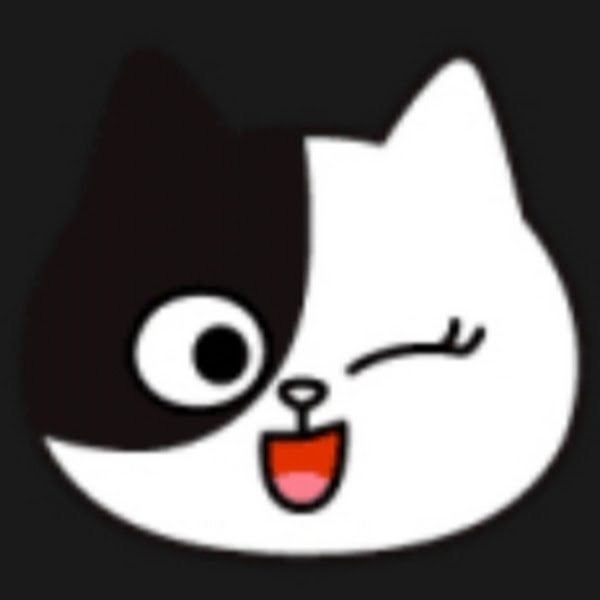

Grayscale Image


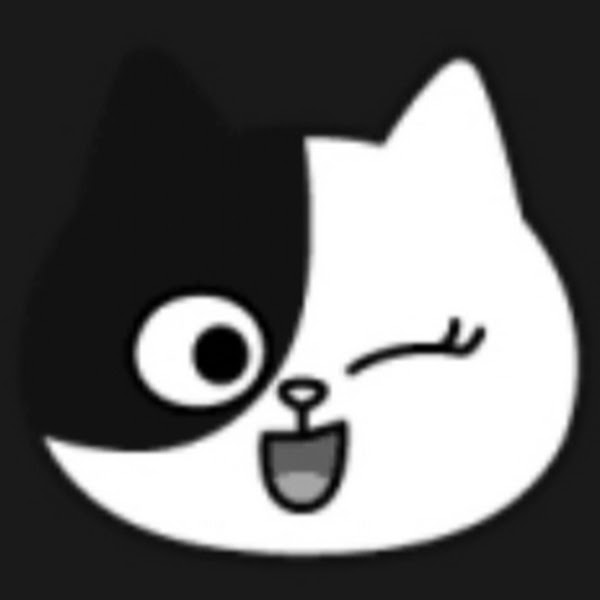

Blurred Image


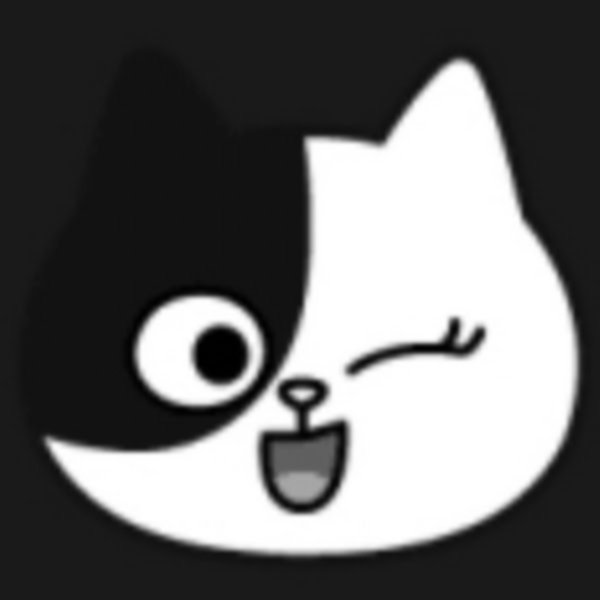

Canny Edge Detection


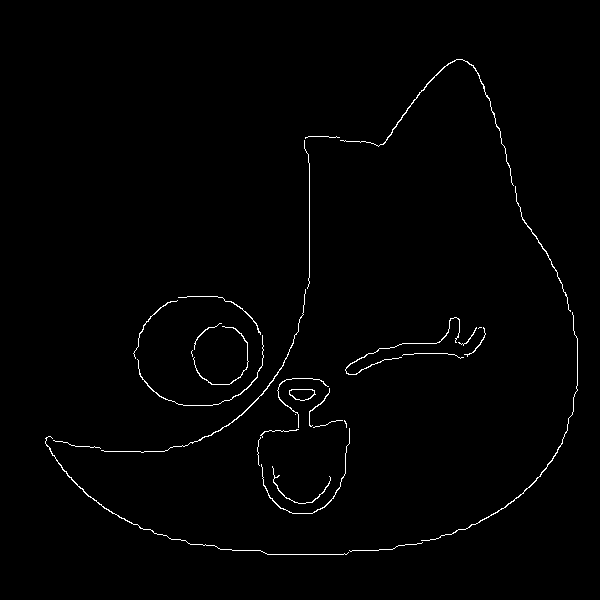

In [18]:
# นำเข้าฟังก์ชัน cv2_imshow จาก google.colab.patches
# cv2_imshow เป็นฟังก์ชันพิเศษสำหรับแสดงรูปภาพ OpenCV ในสภาพแวดล้อม Google Colab
from google.colab.patches import cv2_imshow

# แสดงรูปภาพต้นฉบับที่อัปโหลดมา
print("Original Image")
cv2_imshow(img_uploaded) # ใช้ cv2_imshow แทน cv2.imshow

# แสดงรูปภาพที่แปลงเป็น Grayscale แล้ว
print("Grayscale Image")
cv2_imshow(gray_img)

# แสดงรูปภาพที่ผ่านการเบลอแบบ Gaussian แล้ว
print("Blurred Image")
cv2_imshow(blurred_img)

# แสดงรูปภาพที่ผ่านการตรวจจับขอบด้วย Canny Edge Detection แล้ว
print("Canny Edge Detection")
cv2_imshow(canny_img)